# Global terrorism analysis over the period 1970-2017

## Import the data  

Place the file downloaded from [Kaggle](https://www.kaggle.com/START-UMD/gtd) into the folder where the project is located. The data is stored in the variable _data_.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1',low_memory=False)
data['iyear'] = data['iyear'].astype('object', copy=False)

## Number of terrorist attempts per year

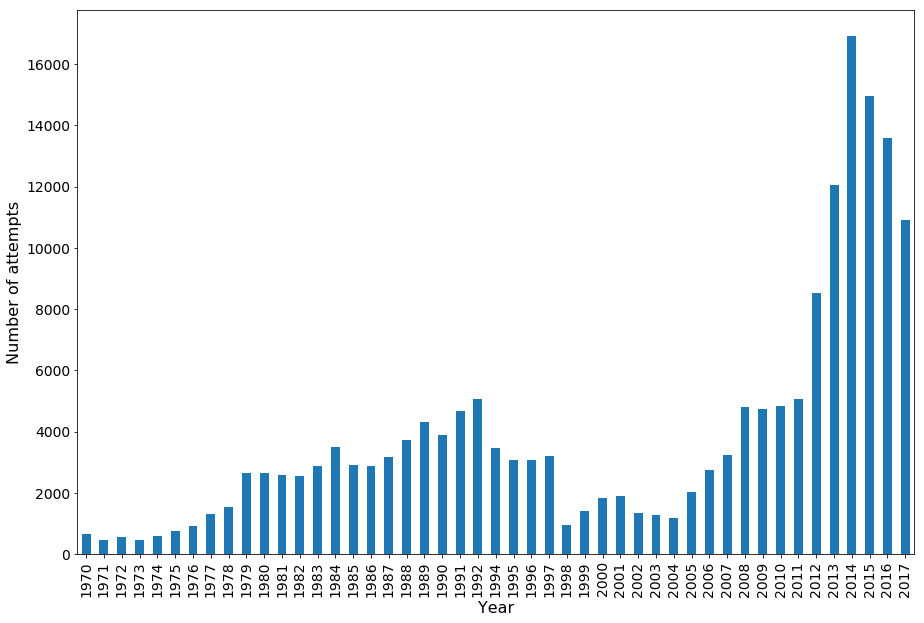

In [2]:
ax1 = data['iyear'].value_counts().sort_index().plot(kind='bar', figsize=(15, 10), fontsize=14)
tmp = ax1.set_xlabel("Year", fontsize=16)
tmp = ax1.set_ylabel("Number of attempts", fontsize=16)

## Global terrorist activity

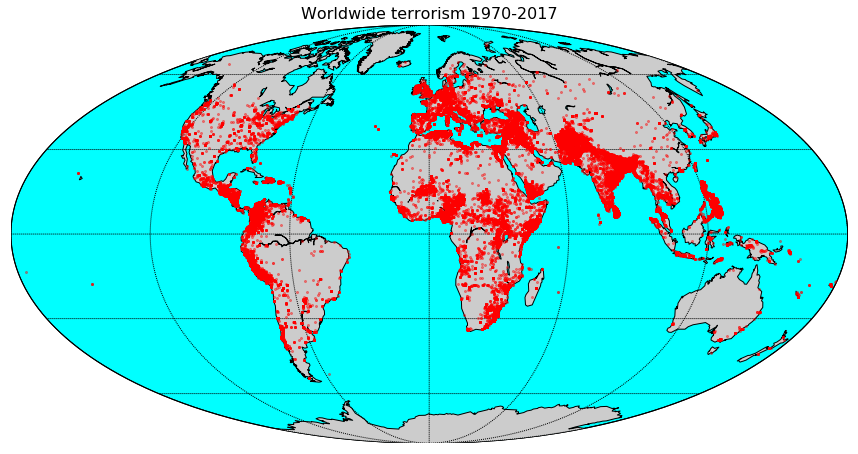

In [3]:
#Coordinates
lats = data['latitude'].to_list()
lons = data['longitude'].to_list()

m = Basemap(projection='moll',resolution='c', lon_0=0)
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.fillcontinents(lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawcoastlines()
x,y = m(lons,lats)
m.plot(x, y, 'go', markersize=2, color = 'r',alpha=0.4)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title("Worldwide terrorism 1970-2017", fontsize=16)
plt.show()

## Islamic State activity in Europe per year

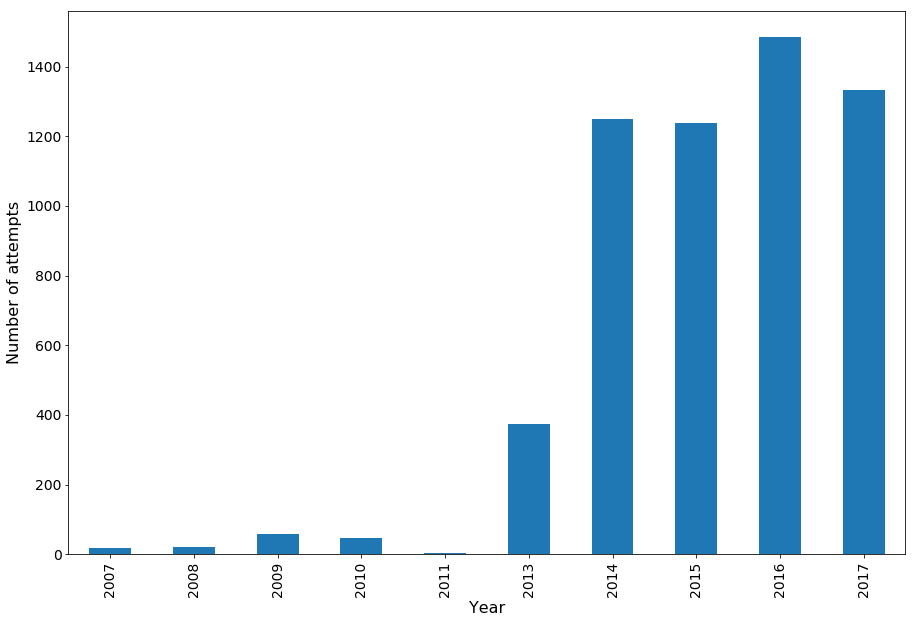

In [4]:
IS_idx = data.gname.str.startswith('Islamic State')
IS = data.where(IS_idx==True)
IS = IS.dropna(how='all')
IS_EU_idx = IS.region_txt.str.contains('europe')
IS_EU = IS.where(IS_EU_idx==True)
IS_EU = IS.dropna(how='all')
ax3 = IS_EU['iyear'].value_counts().sort_index().plot(kind='bar', figsize=(15,10), fontsize=14)
tmp = ax3.set_xlabel('Year', fontsize=16)
tmp = ax3.set_ylabel('Number of attempts', fontsize=16)

## The number of Polish targeted by terrorists

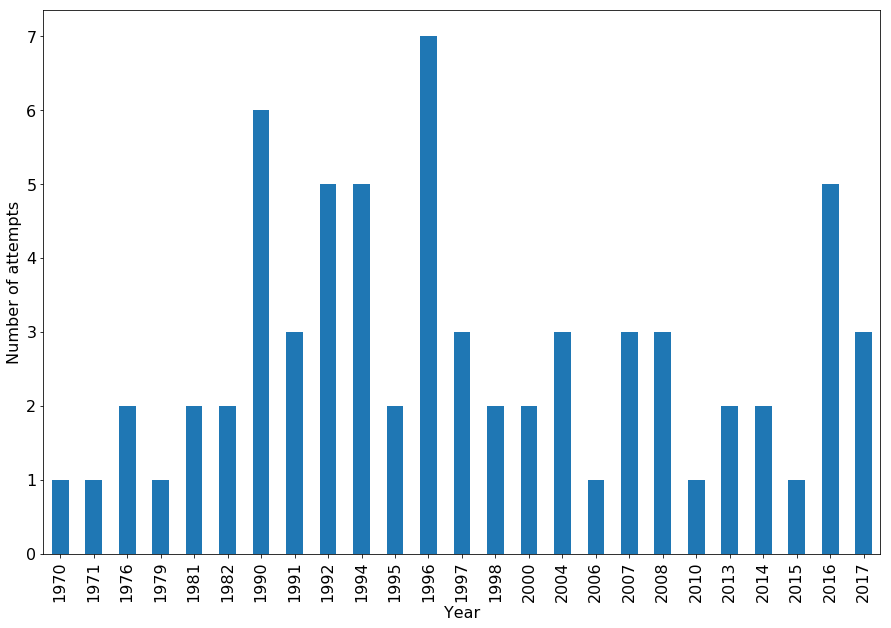

In [5]:
Poland_idx = data.natlty1_txt.str.contains('Poland')
Poland = data.where(Poland_idx==True)
Poland = Poland.dropna(how='all')
ax4 = Poland['iyear'].value_counts().sort_index().plot(kind='bar', figsize=(15,10), fontsize=16)
tmp = ax4.set_xlabel('Year', fontsize=16)
tmp = ax4.set_ylabel('Number of attempts', fontsize=16)

## The most popular weapons used by terrorists

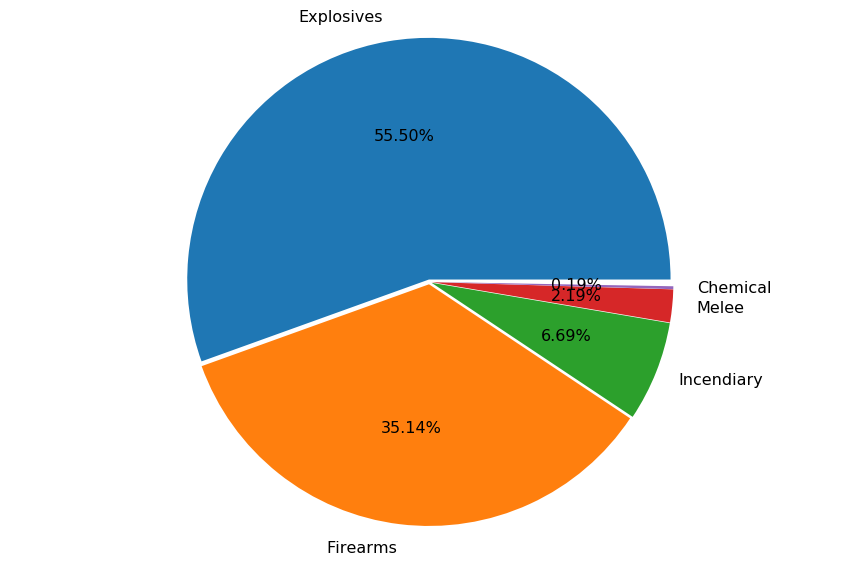

In [6]:
known_weapons = data[data['weaptype1_txt'].str.contains('Unknown') == False]
percentage = known_weapons['weaptype1_txt'].value_counts()/known_weapons['weaptype1_txt'].value_counts().sum()
percentage.name = ''
ax5 = percentage[percentage > 0.001].plot(kind='pie', figsize=(15,10), autopct='%1.2f%%', textprops=dict(size=16), explode=(0.01,0.01,0.01,0.01,0.01))
tmp = ax5.axis('equal')